# 1. Dataset

In [290]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [291]:
df = pd.read_csv('Tourism Customer Behaviour.csv')

df.columns = ['ID пользователя', 'Купил ли билет',
              'Среднегодовое число просмотра туристических сайтов',
              'Предпочитаемое устройство для авторизации',
              'Число лайков на связанные с туризмом публикации за последний год',
              'Среднегодовое число туристических поездок',
              'Число членов семьи', 'Предпочитаемый вид отдыха',
              'Среднеговое число комментариев к связанным с туризмом публикациям',
              'Число лайков на туристические публикации пользователя',
              'Число прошедших после крайней поездки недель',
              'Разегистрирован ли в «нашей» соцсети',
              'Среднемесячное число лайков в «нашей» соцсети', 'Трудоустроен ли',
              'Наличие интересующихся туризмом друзей (1 — много, 4 — мало)',
              'Подросток ли', 'Среднее время, проведённое в «нашей» соцсети']

df.sample(5)

,ID пользователя,Купил ли билет,Среднегодовое число просмотра туристических сайтов,Предпочитаемое устройство для авторизации,Число лайков на связанные с туризмом публикации за последний год,Среднегодовое число туристических поездок,Число членов семьи,Предпочитаемый вид отдыха,Среднеговое число комментариев к связанным с туризмом публикациям,Число лайков на туристические публикации пользователя,Число прошедших после крайней поездки недель,Разегистрирован ли в «нашей» соцсети,Среднемесячное число лайков в «нашей» соцсети,Трудоустроен ли,"Наличие интересующихся туризмом друзей (1 — много, 4 — мало)",Подросток ли,"Среднее время, проведённое в «нашей» соцсети"
2902,1002903,No,277.0,iOS and Android,NaN,10,3,Financial,42.0,13744,1,Yes,25,Yes,1,1.0,16.0
3103,1003104,No,429.0,iOS and Android,11729.0,24,2,Financial,89.0,9484,3,Yes,25,No,2,1.0,17.0
442,1000443,No,270.0,ANDROID,22225.0,10,4,Medical,32.0,9980,1,No,14,No,4,0.0,10.0
10482,1010483,Yes,269.0,Tab,19502.0,23,2,Beach,74.0,5965,3,Yes,26,No,1,0.0,10.0
8035,1008036,No,203.0,Laptop,44908.0,1,3,Historical site,62.0,4300,1,No,19,No,2,0.0,7.0


## 1.1. Разведочный анализ данных

In [292]:
print(f'В датафрейме {df.shape[0]} строк (пользователей) и {df.shape[1]} \
столбцов (характеристик пользователей)')

В датафрейме 11760 строк (пользователей) и 17 столбцов (характеристик пользователей)


Очевидно, ID пользователя ничего не даст нам для прогноза его покупки — удалим данный столбец.

In [293]:
df.drop('ID пользователя', axis=1, inplace=True)

Посмотрим, какие признаки пропущены у некоторых объектов выборки (и сколько процентов пропущенные строки занимают от всей выборки). Видим, что количество пропусков не столь значительное.

In [294]:
for col in df.columns[df.isna().any()]:
  print(f'{col}: \t {(df[col].isna().sum() / len(df) * 100):.2f}%')

Среднегодовое число просмотра туристических сайтов: 	 4.94%
Предпочитаемое устройство для авторизации: 	 0.45%
Число лайков на связанные с туризмом публикации за последний год: 	 3.24%
Среднегодовое число туристических поездок: 	 0.64%
Предпочитаемый вид отдыха: 	 0.26%
Среднеговое число комментариев к связанным с туризмом публикациям: 	 1.75%
Разегистрирован ли в «нашей» соцсети: 	 0.88%
Подросток ли: 	 0.01%
Среднее время, проведённое в «нашей» соцсети: 	 0.01%


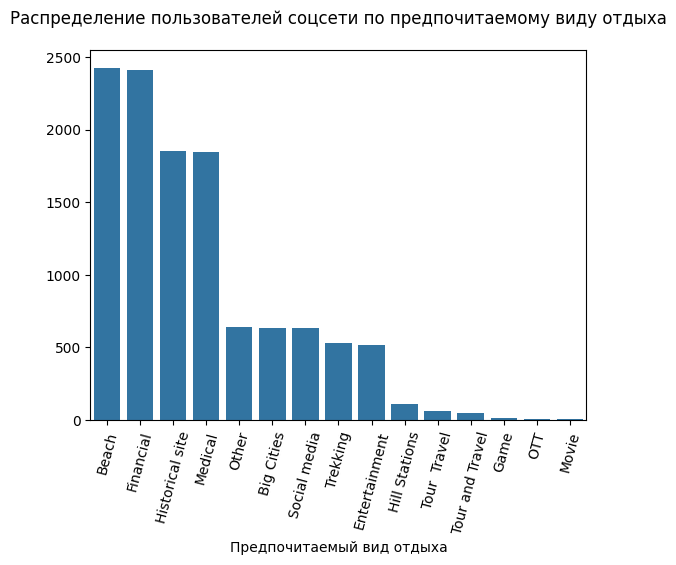

In [295]:
preferred_loc = df['Предпочитаемый вид отдыха'].value_counts()
sns.barplot(x = preferred_loc.index, y = preferred_loc.values)
plt.title('Распределение пользователей соцсети по предпочитаемому виду отдыха', y=1.05)
plt.xticks(rotation=75);

## 1.2. Предобработка данных

In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 16 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Купил ли билет                                                     11760 non-null  object 
 1   Среднегодовое число просмотра туристических сайтов                 11179 non-null  float64
 2   Предпочитаемое устройство для авторизации                          11707 non-null  object 
 3   Число лайков на связанные с туризмом публикации за последний год   11379 non-null  float64
 4   Среднегодовое число туристических поездок                          11685 non-null  object 
 5   Число членов семьи                                                 11760 non-null  object 
 6   Предпочитаемый вид отдыха                                          11729 non-null  object 
 7   Среднеговое число комм

In [297]:
for col in df.columns:
  print(f'{col}:\n', df[col].unique(), '\n')

Купил ли билет:
 ['Yes' 'No'] 

Среднегодовое число просмотра туристических сайтов:
 [307. 367. 277. 247. 202. 240.  nan 225. 285. 270. 262. 217. 232. 255.
 210. 165. 397. 180. 157. 330. 345. 292. 322. 375. 195. 360. 412. 382.
 300. 405. 435. 150. 187.  42. 427. 352.  35. 450. 135. 308. 368. 249.
 205. 445. 226. 287. 271. 263. 219. 234. 256. 212. 241. 399. 286. 182.
 159. 316. 332. 347. 248. 331. 294. 323. 376. 265. 204. 309. 257. 346.
 264. 361. 196. 278. 444. 272. 414. 339. 443. 233. 280. 422. 174. 384.
 302. 242. 181. 211. 436. 279. 151. 377. 188. 189. 166. 406. 324. 197.
 143. 167. 383. 227. 144. 301. 429. 203. 250. 413. 338. 310. 392. 317.
 354. 400. 369. 137. 136. 295. 391. 353. 218. 362. 428. 451. 430. 173.
 190. 398. 355. 437. 407. 152. 421. 158. 293. 235. 220. 340. 385. 370.
 325. 415. 452. 315. 379. 290. 231. 281. 269. 222. 244. 221. 246. 402.
 184. 276. 258. 168. 259. 404. 318. 333. 252. 304. 378. 273. 282. 253.
 199. 215. 228. 356. 268. 366. 335. 266. 254. 274. 291. 448. 41

В некоторых местах вместо цифры 3 написано слово Three. Где-то написано Android, а где-то — ANDROID. Все такого рода оплошности исправляются в ячейке кода ниже.

In [298]:
df['Предпочитаемое устройство для авторизации'].replace({'ANDROID': 'Android', \
  'Android OS': 'Android', 'Others': 'Other', \
  'Mobile': 'iOS and Android'}, inplace=True)

df['Предпочитаемый вид отдыха'].replace('Tour  Travel', 'Tour and Travel', \
  inplace=True)

df['Трудоустроен ли'].replace('0', 'No', inplace=True)

df['Разегистрирован ли в «нашей» соцсети'].replace({'Yeso': 'Yes', \
  '1': 'Yes', '0': 'No'}, inplace=True)

df['Число членов семьи'].replace('Three', '3', inplace=True)

df['Купил ли билет'].replace({'Yes': 1, 'No': 0}, inplace=True)

In [299]:
for col in df.columns:
  print(f'{col}:\n', df[col].unique(), '\n')

Купил ли билет:
 [1 0] 

Среднегодовое число просмотра туристических сайтов:
 [307. 367. 277. 247. 202. 240.  nan 225. 285. 270. 262. 217. 232. 255.
 210. 165. 397. 180. 157. 330. 345. 292. 322. 375. 195. 360. 412. 382.
 300. 405. 435. 150. 187.  42. 427. 352.  35. 450. 135. 308. 368. 249.
 205. 445. 226. 287. 271. 263. 219. 234. 256. 212. 241. 399. 286. 182.
 159. 316. 332. 347. 248. 331. 294. 323. 376. 265. 204. 309. 257. 346.
 264. 361. 196. 278. 444. 272. 414. 339. 443. 233. 280. 422. 174. 384.
 302. 242. 181. 211. 436. 279. 151. 377. 188. 189. 166. 406. 324. 197.
 143. 167. 383. 227. 144. 301. 429. 203. 250. 413. 338. 310. 392. 317.
 354. 400. 369. 137. 136. 295. 391. 353. 218. 362. 428. 451. 430. 173.
 190. 398. 355. 437. 407. 152. 421. 158. 293. 235. 220. 340. 385. 370.
 325. 415. 452. 315. 379. 290. 231. 281. 269. 222. 244. 221. 246. 402.
 184. 276. 258. 168. 259. 404. 318. 333. 252. 304. 378. 273. 282. 253.
 199. 215. 228. 356. 268. 366. 335. 266. 254. 274. 291. 448. 417. 455.

Удалим объект выборки (строку таблицы), которому в графу "среднегодовое число туристических поездок" приписали звёздочку.

In [300]:
df = df[df['Среднегодовое число туристических поездок'] != '*']

И вообще удалим все объекты выборки, у которых пропущены какие-либо значения признаков.

In [301]:
df.dropna(inplace=True)

<ipython-input-301-c64f9f573c18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


У признаков «Подросток ли» и «Наличие интересующихся туризмом друзей» тип данных изменим на `object`, у признака «Число членов семьи» — на `int`.

In [302]:
df = df.astype({'Подросток ли': object, \
  'Наличие интересующихся туризмом друзей (1 — много, 4 — мало)': object,
  'Число членов семьи': int})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10454 entries, 0 to 11759
Data columns (total 16 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Купил ли билет                                                     10454 non-null  int64  
 1   Среднегодовое число просмотра туристических сайтов                 10454 non-null  float64
 2   Предпочитаемое устройство для авторизации                          10454 non-null  object 
 3   Число лайков на связанные с туризмом публикации за последний год   10454 non-null  float64
 4   Среднегодовое число туристических поездок                          10454 non-null  object 
 5   Число членов семьи                                                 10454 non-null  int64  
 6   Предпочитаемый вид отдыха                                          10454 non-null  object 
 7   Среднеговое число комментар

Посмотрим на предпочтения пользователей соцсети в выборе мест отдыха.

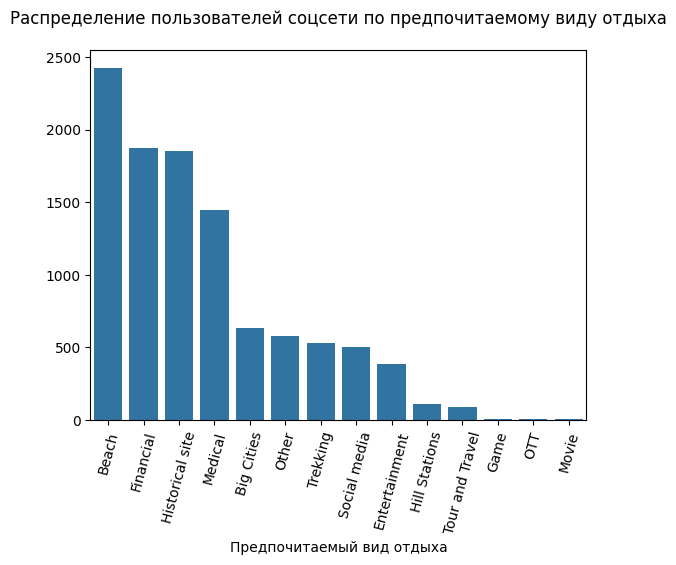

In [351]:
preferred_loc = df['Предпочитаемый вид отдыха'].value_counts()
sns.barplot(x = preferred_loc.index, y = preferred_loc.values)
plt.title('Распределение пользователей соцсети по предпочитаемому виду отдыха', y=1.05)
plt.xticks(rotation=75);

Далее нам пригодится список категориальных признаков для One-Hot-Encoding.

In [303]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

Отделим признаки объектов от значений целевой переменной.

In [304]:
X = df.drop('Купил ли билет', axis=1)
y = df['Купил ли билет']

Применим к категориальным признаком One-Hot-Encoding.

In [305]:
X_ohe = pd.get_dummies(X, columns = categorical_columns, dtype='int')
pd.set_option('display.max_columns', None)
X_ohe.sample(10)

,Среднегодовое число просмотра туристических сайтов,Число лайков на связанные с туризмом публикации за последний год,Число членов семьи,Среднеговое число комментариев к связанным с туризмом публикациям,Число лайков на туристические публикации пользователя,Число прошедших после крайней поездки недель,Среднемесячное число лайков в «нашей» соцсети,"Среднее время, проведённое в «нашей» соцсети",Предпочитаемое устройство для авторизации_Android,Предпочитаемое устройство для авторизации_Laptop,Предпочитаемое устройство для авторизации_Other,Предпочитаемое устройство для авторизации_Tab,Предпочитаемое устройство для авторизации_iOS,Предпочитаемое устройство для авторизации_iOS and Android,Среднегодовое число туристических поездок_1,Среднегодовое число туристических поездок_10,Среднегодовое число туристических поездок_11,Среднегодовое число туристических поездок_12,Среднегодовое число туристических поездок_13,Среднегодовое число туристических поездок_14,Среднегодовое число туристических поездок_15,Среднегодовое число туристических поездок_16,Среднегодовое число туристических поездок_17,Среднегодовое число туристических поездок_18,Среднегодовое число туристических поездок_19,Среднегодовое число туристических поездок_2,Среднегодовое число туристических поездок_20,Среднегодовое число туристических поездок_21,Среднегодовое число туристических поездок_22,Среднегодовое число туристических поездок_23,Среднегодовое число туристических поездок_24,Среднегодовое число туристических поездок_25,Среднегодовое число туристических поездок_26,Среднегодовое число туристических поездок_27,Среднегодовое число туристических поездок_28,Среднегодовое число туристических поездок_29,Среднегодовое число туристических поездок_3,Среднегодовое число туристических поездок_4,Среднегодовое число туристических поездок_5,Среднегодовое число туристических поездок_6,Среднегодовое число туристических поездок_7,Среднегодовое число туристических поездок_8,Среднегодовое число туристических поездок_9,Предпочитаемый вид отдыха_Beach,Предпочитаемый вид отдыха_Big Cities,Предпочитаемый вид отдыха_Entertainment,Предпочитаемый вид отдыха_Financial,Предпочитаемый вид отдыха_Game,Предпочитаемый вид отдыха_Hill Stations,Предпочитаемый вид отдыха_Historical site,Предпочитаемый вид отдыха_Medical,Предпочитаемый вид отдыха_Movie,Предпочитаемый вид отдыха_OTT,Предпочитаемый вид отдыха_Other,Предпочитаемый вид отдыха_Social media,Предпочитаемый вид отдыха_Tour and Travel,Предпочитаемый вид отдыха_Trekking,Разегистрирован ли в «нашей» соцсети_No,Разегистрирован ли в «нашей» соцсети_Yes,Трудоустроен ли_No,Трудоустроен ли_Yes,"Наличие интересующихся туризмом друзей (1 — много, 4 — мало)_1","Наличие интересующихся туризмом друзей (1 — много, 4 — мало)_2","Наличие интересующихся туризмом друзей (1 — много, 4 — мало)_3","Наличие интересующихся туризмом друзей (1 — много, 4 — мало)_4",Подросток ли_0.0,Подросток ли_1.0,Подросток ли_2.0,Подросток ли_3.0
9515,292.0,21928.0,4,68.0,10658,5,27,21.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0
10137,209.0,45450.0,2,63.0,2436,2,32,11.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0
10452,217.0,15444.0,3,59.0,2759,2,22,9.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0
7892,292.0,5883.0,3,89.0,7864,4,21,10.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0
3905,188.0,30907.0,1,73.0,3710,4,19,15.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1
5691,263.0,10646.0,3,99.0,5872,3,28,19.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0
7538,264.0,37422.0,1,53.0,9559,1,23,10.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0

In [307]:
features = X_ohe.columns

In [308]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
X_ohe = minmaxscaler.fit_transform(X_ohe)

# 2. Логистическая регрессия

In [310]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, test_size=0.2, random_state=42)

In [311]:
from sklearn.linear_model import LogisticRegressionCV

log_reg = LogisticRegressionCV(class_weight = 'balanced')
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [312]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
recall = recall_score(y_test, y_pred)
print(recall)

0.6893491124260355


In [283]:
log_reg.coef_

array([[-1.51363111e+00, -1.36273328e+00, -3.75414032e-01,
         9.00041774e-03, -1.94032147e+00,  1.59375006e+00,
        -3.83761319e-01, -2.48420360e-01, -1.05921975e+00,
         8.61070555e-01,  8.29846748e-02,  2.07725610e-01,
         2.69298910e-01, -3.50575381e-01, -3.59438729e-01,
        -4.34892894e-01, -2.92274481e-01,  9.49425057e-01,
         4.58549928e-01,  1.43491209e-04,  7.79135901e-01,
         2.27406039e-01,  1.12082056e-01, -4.47267050e-01,
        -7.97557352e-01, -2.91918092e-01, -3.45337397e-01,
         7.23244290e-01,  3.53769840e-01,  5.37867501e-01,
         9.97882632e-01, -2.68637770e-02, -3.55925816e-01,
         3.24885893e-01, -1.03039848e-01,  3.76026255e-01,
        -2.61730863e-01, -5.76152078e-01, -6.69202862e-01,
        -5.50924935e-01, -2.11936708e-01, -4.10145398e-01,
         3.05474013e-01, -6.98652937e-01,  8.54170497e-02,
         6.31116038e-01, -1.51212212e-01, -3.24955506e-01,
        -6.47124384e-02, -7.13822719e-01,  7.63877535e-0

In [344]:
features_importance = pd.DataFrame()
features_importance['Features'] = features
features_importance['Coefficients'] = log_reg.coef_.T
features_importance.sort_values(by = 'Coefficients', ascending=False, inplace=True)



---


На графике ниже отразим степень влияния тех или иных характеристик пользователя на вероятность покупки им билета в следующем месяце. Высокий столбец, смотрящий вверх, говорит о том, что наличие данного признака у пользователя сильно повышает вероятность покупки им билета. Высокий столбец, смотрящий вниз, обратно, символизирует, что пользователь, характеризующийся данным признаком, с высокой вероятностью ***не*** купит билет в следующем месяце.


---



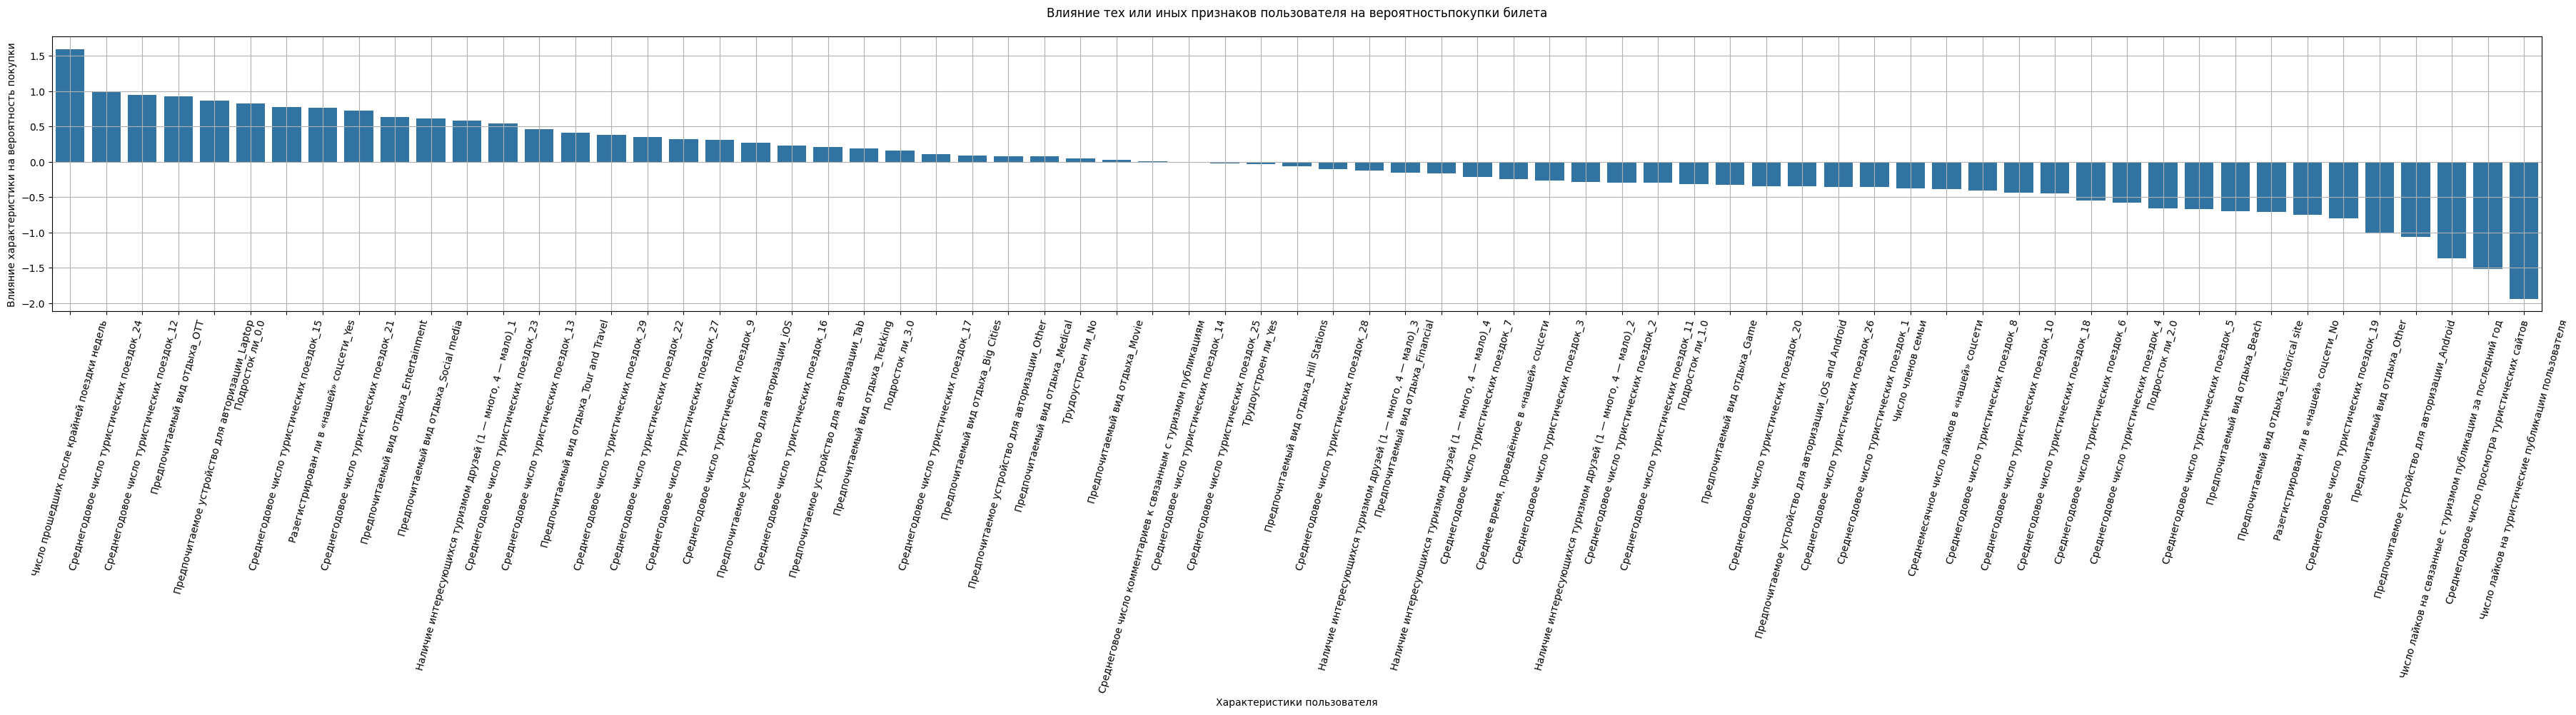

In [348]:
fig, ax = plt.subplots(figsize=(45, 5))

sns.barplot(x = features_importance['Features'],\
            y = features_importance['Coefficients'], ax=ax,\
            )

plt.title('Влияние тех или иных признаков пользователя на вероятность\
покупки билета', y=1.05)
plt.xlabel('Характеристики пользователя')
plt.ylabel('Влияние характеристики на вероятность покупки')
plt.xticks(rotation=75)

ax.grid(True);

# 3. Случайный лес

In [352]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [350]:
random_forest = RandomForestClassifier(n_estimators=100, max_depth=50, random_state=0)
random_forest.fit(X_train, y_train)
random_forest_preds = random_forest.predict(X_test)
print("Метрики качества классификации методом случайного леса:\n", \
      classification_report(y_test, random_forest_preds))

Метрики качества классификации методом случайного леса:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1753
           1       1.00      0.90      0.95       338

    accuracy                           0.98      2091
   macro avg       0.99      0.95      0.97      2091
weighted avg       0.98      0.98      0.98      2091



# 4. XGBoost

In [353]:
from xgboost import XGBClassifier

In [354]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)
print("Метрики качества классификации методом экстремального градиентного\
бустинга:\n", classification_report(y_test, xgb_preds))

Метрики качества классификации методом экстремального градиентногобустинга:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1753
           1       1.00      0.93      0.97       338

    accuracy                           0.99      2091
   macro avg       0.99      0.97      0.98      2091
weighted avg       0.99      0.99      0.99      2091

